# Finite Size Scaling (2D Ising model)

## Useful functions

$$m(T,L) = L^{-\beta/\nu} \hat f[(T - T_c)L^{1/\nu}] $$
$$\chi(T,L) = L^{\gamma/\nu}\hat g[(T-T_c)L^{1/\nu}]$$
<br>
Exact values for 2D Ising model are $\beta = \frac{1}{8}$, $\nu = 1$, and $\gamma = \frac{7}{4}$. <br><br>

We choose $x$ axis as $x = (T-T_c)L^{1/\nu}$ and $y$ axis as $y = m(T,L)L^{\beta/\nu}$. <br>
Therefore, $x = (T - 2.269)L$ and $y = m(T,L)L^{1/8}$. <br><br>

We choose $x'$ aixs as $x' = (T-T_c)L^{1/\nu}$ and $y'$ axis as $y' = \chi(T,L)L^{-\gamma/\nu}$. <br>
Therefore, $x' = (T-2.269)L$ and $y' = \chi(T,L)L^{-7/4}$.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [44]:
def magnetization(lattice):
    '''
    This is a function that returns absolute of spontaneous magnetization of a spin configuration.
    Not returns magnetization per spin.
    '''
    L = len(lattice)
    m = 0
    for i in range(L):
        for j in range(L):
            m += lattice[i,j]
    
    return abs(m)

In [45]:
def Ising_model(lattice, temperature_array, n0, d_delta, mcmax):
    '''
    This if a function which conducts computing statistics of 2D Ising lattice. 
    This function returns (ensemble) averaged magnetization per spin, magnetic susceptibility, and 4th cummulant (the Binder cummulant).
    '''
    
    L = len(lattice)
    
    M_average = []
    suscept = []
    cummulant = []
    
    for tt in temperature_array:
        m = 0
        mag = []
        mag2 = []
        mag4 = []
        equil = 0
        count = 0
        
        while equil <= mcmax:
            if equil < n0:
                for i in range(L):
                    for j in range(L):
                        s = lattice[i,j]
                        neigh = lattice[(i+1)%L, j] + lattice[i,(j+1)%L] + lattice[(i-1)%L,j] + lattice[i,(j-1)%L]
                        DE = 2 * s * neigh 
 
                        if DE < 0:
                            s *= -1 
                        elif np.random.rand() < np.exp(- DE*1/tt):
                            s *= -1 
                        lattice[i,j] = s
                equil += 1;
                
            else:
                x = np.random.randint(L)
                y = np.random.randint(L)
                s = lattice[x,y]  
                neigh = lattice[(x+1)%L, y] + lattice[x,(y+1)%L] + lattice[(x-1)%L,y] + lattice[x,(y-1)%L]
                DE = 2 * s * neigh 

                #accept or reject 
                if DE < 0:
                    s *= -1 

                elif np.random.rand() < np.exp(- DE*1/tt):
                    s *= -1 

                lattice[x,y] = s
                count += 1;
                m = 0;

                if count == n_delta:
                    count = 0;
                    m = magnetization(lattice)
                    mag.append(m)
                    mag2.append(m**2) 
                    mag4.append(m**4)

                equil += 1;
            
        M_average.append(np.average(mag)/L**2)
        suscept.append((np.average(mag2) - (np.average(mag))**2)/L**2)
        cummulant.append(1- 1/3 * np.average(mag4)/(np.average(mag2)**2)) 
        
    return M_average, suscept, cummulant

In [74]:
def finite_size_scaling(lattice, temperature_array, critical_temperature, mags, suscepts):
    '''
    This function is a function for finite size scaling.
    '''
    
    L = len(lattice)
    scaled_temperature = (temperature_array - critical_temperature) * L
    Mags, Sus = [], []
    
    for m in mags:
        Mags.append(m * L**(+1/8))
    for s in suscepts:
        Sus.append(s * L **(-7/4))
        
    return scaled_temperature, Mags, Sus 

### Critical point finding

In [50]:
L1, L2, L3, L4, L5 = 4, 6, 8, 10, 12

lattice1 = - np.ones((L1,L1))
lattice2 = - np.ones((L2,L2))
lattice3 = - np.ones((L3,L3))
lattice4 = - np.ones((L4,L4))
lattice5 = - np.ones((L5,L5))

T = np.linspace(1,4,30)


n0 = 2000
n_delta = n0/2
mcmax = 1500000

In [51]:
start = time.time()
mav1, sus1, u1 = Ising_model(lattice1, T, n0, n_delta, mcmax)
mav2, sus2, u2 = Ising_model(lattice2, T, n0, n_delta, mcmax)
mav3, sus3, u3 = Ising_model(lattice3, T, n0, n_delta, mcmax)
mav4, sus4, u4 = Ising_model(lattice4, T, n0, n_delta, mcmax)
mav5, sus5, u5 = Ising_model(lattice5, T, n0, n_delta, mcmax)
end = time.time() - start
print(end/60, 'min')

27.035752324263253 min


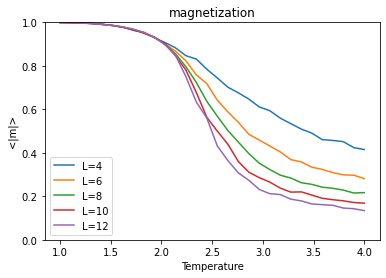

In [62]:
#plot of magnetizations
plt.plot(T, mav1, label = 'L=4')
plt.plot(T, mav2, label = 'L=6')
plt.plot(T, mav3, label = 'L=8')
plt.plot(T, mav4, label = 'L=10')
plt.plot(T, mav5, label = 'L=12')

plt.title('magnetization');
plt.xlabel('Temperature');
plt.ylabel('<|m|>');
plt.ylim(0,1);
plt.legend(loc = 'lower left');
plt.savefig('magnetizations.png')

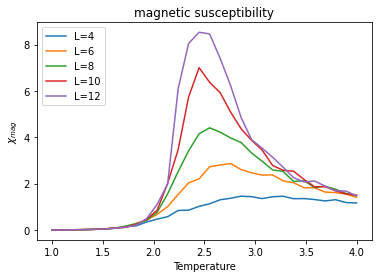

In [63]:
#plot of magnetizations
plt.plot(T, sus1, label = 'L=4')
plt.plot(T, sus2, label = 'L=6')
plt.plot(T, sus3, label = 'L=8')
plt.plot(T, sus4, label = 'L=10')
plt.plot(T, sus5, label = 'L=12')

plt.title('magnetic susceptibility');
plt.xlabel('Temperature');
plt.ylabel('$\chi_{mag}$');
plt.legend(loc = 'upper left');
plt.savefig('susceptibilities.png')

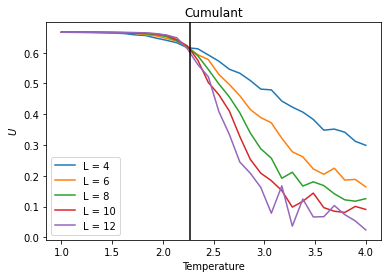

In [64]:
# Plot of Binder cumulants.
plt.plot(T, u1, label = 'L = 4')
plt.plot(T, u2, label = 'L = 6')
plt.plot(T, u3, label = 'L = 8')
plt.plot(T, u4, label = 'L = 10')
plt.plot(T, u5, label = 'L = 12')

plt.title('Cumulant');
plt.axvline(x = 2.269, color = 'black')
plt.xlabel('Temperature')
plt.ylabel('$U$')
plt.legend(loc = 'lower left');
plt.savefig('cummulants.png')

### Finite size scaling

In [65]:
Tc = 2.269

In [75]:
sT1, Mags1, Sus1 = finite_size_scaling(lattice1, T, Tc, mav1, sus1)
sT2, Mags2, Sus2 = finite_size_scaling(lattice2, T, Tc, mav2, sus2)
sT3, Mags3, Sus3 = finite_size_scaling(lattice3, T, Tc, mav3, sus3)
sT4, Mags4, Sus4 = finite_size_scaling(lattice4, T, Tc, mav4, sus4)
sT5, Mags5, Sus5 = finite_size_scaling(lattice5, T, Tc, mav5, sus5)

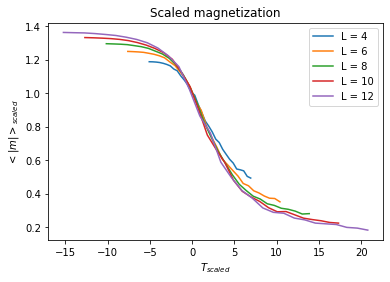

In [76]:
plt.plot(sT1, Mags1, label = 'L = 4')
plt.plot(sT2, Mags2, label = 'L = 6')
plt.plot(sT3, Mags3, label = 'L = 8')
plt.plot(sT4, Mags4, label = 'L = 10')
plt.plot(sT5, Mags5, label = 'L = 12')

plt.title('Scaled magnetization');
plt.xlabel('$T_{scaled}$');
plt.ylabel('$<|m|>_{scaled}$');
plt.legend(loc = 'upper right');
plt.savefig('scaled magnetization.png');

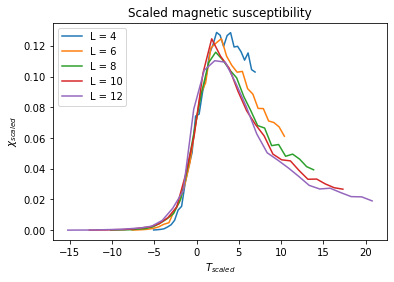

In [69]:
plt.plot(sT1, Sus1, label = 'L = 4')
plt.plot(sT2, Sus2, label = 'L = 6')
plt.plot(sT3, Sus3, label = 'L = 8')
plt.plot(sT4, Sus4, label = 'L = 10')
plt.plot(sT5, Sus5, label = 'L = 12')

plt.title('Scaled magnetic susceptibility');
plt.xlabel('$T_{scaled}$');
plt.ylabel('$\chi_{scaled}$');
plt.legend(loc = 'upper left');
plt.savefig('scaled susceptibility.png');